In [64]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt

# Korean fond setting - get font(Malgun Gothic) by absolute path
import matplotlib
fontname = matplotlib.font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()  # absolute path
matplotlib.rc('font', family=fontname)
matplotlib.rcParams['axes.unicode_minus'] = False
print(fontname)

# import mglearn in higher directory
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))
import mglearn

Malgun Gothic


### Decision Tree

#### ( with load_breast_cancer() )

#### Controlling the complexity of Decision Tree (max_depth parameter)

In [10]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(f'훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}')
print(f'테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}')

훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.937


In [11]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print(f'훈련 세트 정확도 : {tree.score(X_train, y_train):.3f}')
print(f'테스트 세트 정확도 : {tree.score(X_test, y_test):.3f}')

훈련 세트 정확도 : 0.988
테스트 세트 정확도 : 0.951


In [12]:
tree

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Analyzing the Decision Tree

In [13]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [14]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot',
                class_names=cancer.target_names,
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

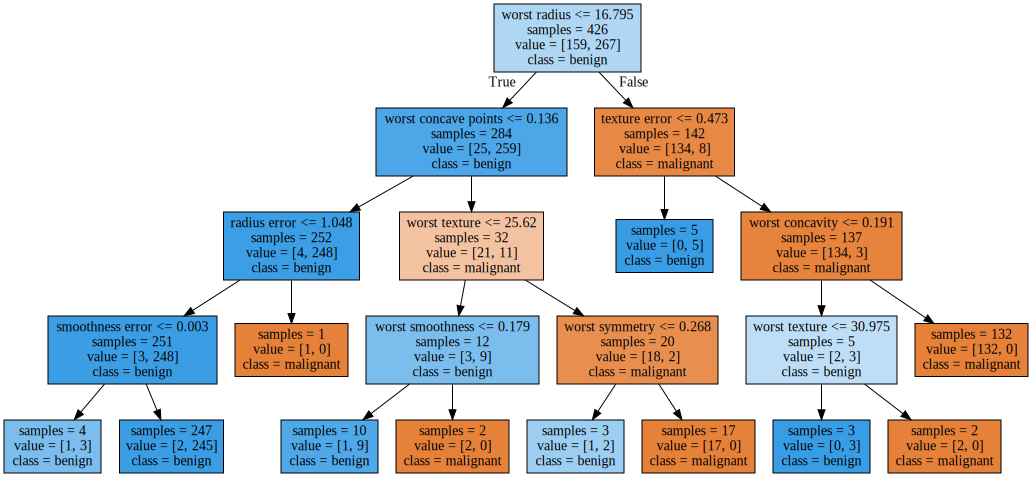

In [15]:
import graphviz

with open('tree.dot') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature importance of the tree

In [18]:
print('feature importance : \n', tree.feature_importances_)

feature importance : 
 [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


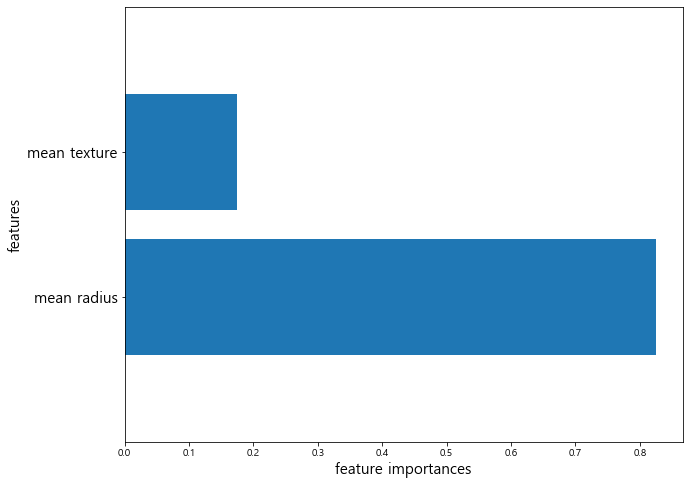

In [142]:
def plot_feature_importances_cancer(model):
    n_features = model.feature_importances_.shape[0]
    plt.figure(figsize=(10,8))
    plt.barh(np.arange(n_features),
             model.feature_importances_, align='center')
    
    plt.xlabel('feature importances', size=15)
    
    plt.yticks(np.arange(n_features), cancer.feature_names, size=15)
    plt.ylabel('features', size=15)
    plt.ylim(-1, n_features)    

plot_feature_importances_cancer(tree)

#### extrapolation with DecisionTreeRegressor ( with ram_price.csv )

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


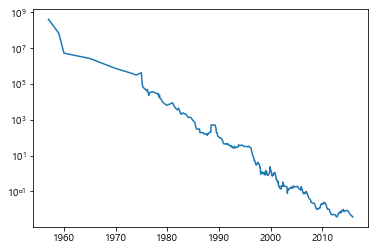

In [65]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.show()

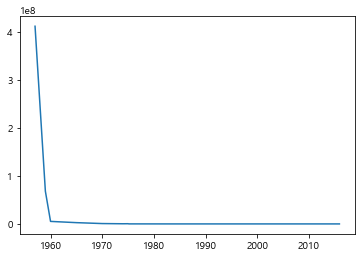

In [61]:
plt.plot(ram_prices.date, ram_prices.price)
plt.show()

In [70]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

data_train = ram_prices[ ram_prices.date < 2000 ]
data_test = ram_prices[ ram_prices.date >= 2000 ]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

price_tree[:5], price_lr[:5]

(array([4.11041792e+08, 6.79477250e+07, 5.24288000e+06, 2.64241200e+06,
        7.34003000e+05]),
 array([1.54158963e+08, 6.53907734e+07, 4.25883016e+07, 4.99067806e+06,
        5.84828851e+05]))

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


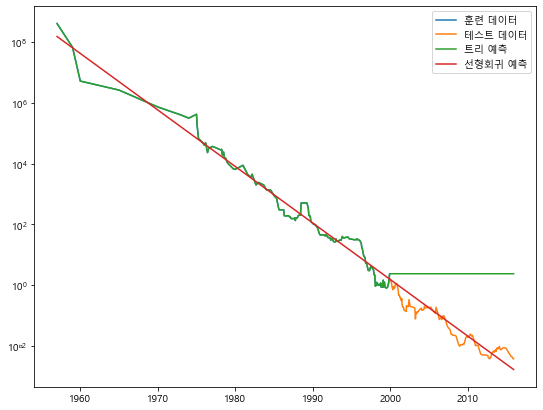

In [74]:
plt.figure(figsize=(9, 7))
plt.semilogy(data_train.date, data_train.price, label='훈련 데이터')
plt.semilogy(data_test.date, data_test.price, label='테스트 데이터')
plt.semilogy(ram_prices.date, price_tree, label='트리 예측')
plt.semilogy(ram_prices.date, price_lr, label='선형회귀 예측')
plt.legend()
plt.show()

### Ensemble of Decision Tree
#### Random Forest ( with make_moons() )

In [129]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

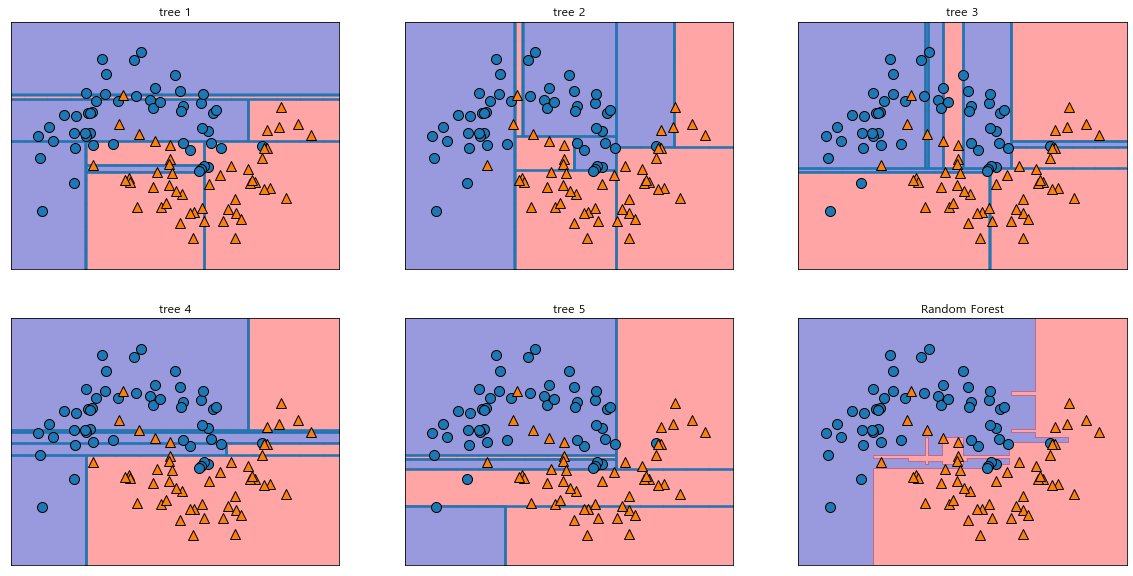

In [130]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))

# each decision tree
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title(f"tree {i+1}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# random forest
mglearn.plots.plot_2d_separator(forest, X, fill=True, ax=axes[-1,-1], alpha=.4)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

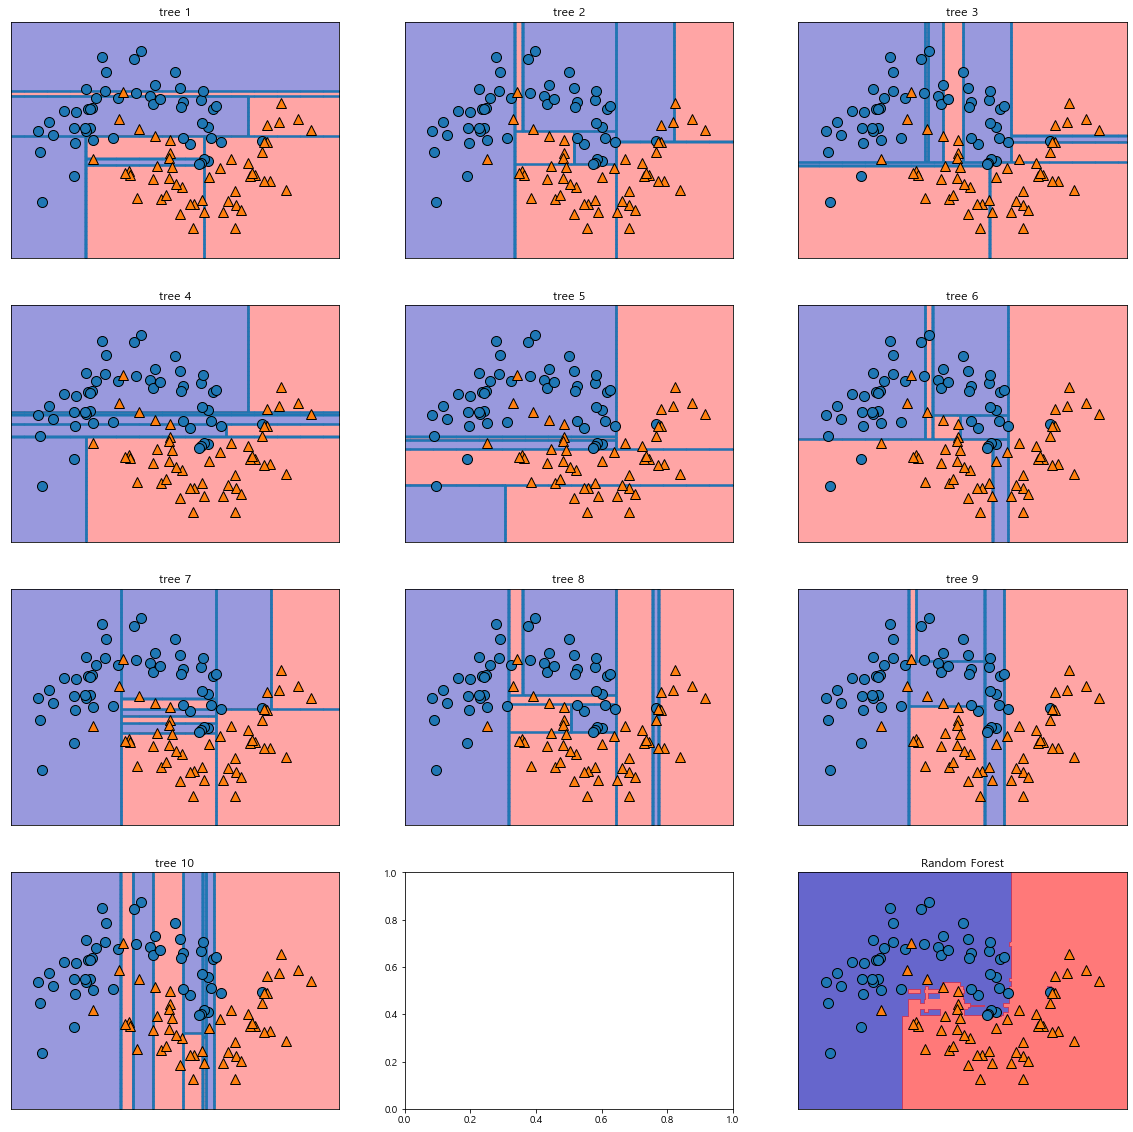

In [132]:
forest10 = RandomForestClassifier(n_estimators=10, random_state=2)
forest10.fit(X_train, y_train)

# plt figure setting
n_row = len(forest10.estimators_)//3
fig, axes = plt.subplots( n_row+1, len(forest10.estimators_)//n_row, figsize=(20,20))

# each decision tree
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest10.estimators_)):
    ax.set_title(f"tree {i+1}")
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# random forest
mglearn.plots.plot_2d_separator(forest10, X, fill=True, ax=axes[-1,-1], alpha=.6)
axes[-1,-1].set_title('Random Forest')
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.show()

In [144]:
# only RF plot
# plt.figure(figsize=(5,5))
# mglearn.plots.plot_2d_separator(forest10, X, fill=True, alpha=.6)
# plt.title('Random Forest')
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plt.show()

#### ( with load_breast_cancer() )

In [138]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

forest100 = RandomForestClassifier(n_estimators=100, random_state=0)
forest100.fit(X_train, y_train)

print(f'train set score : {forest100.score(X_train, y_train):.3f}')
print(f'test set score : {forest100.score(X_test, y_test):.3f}')

train set score : 1.000
test set score : 0.972


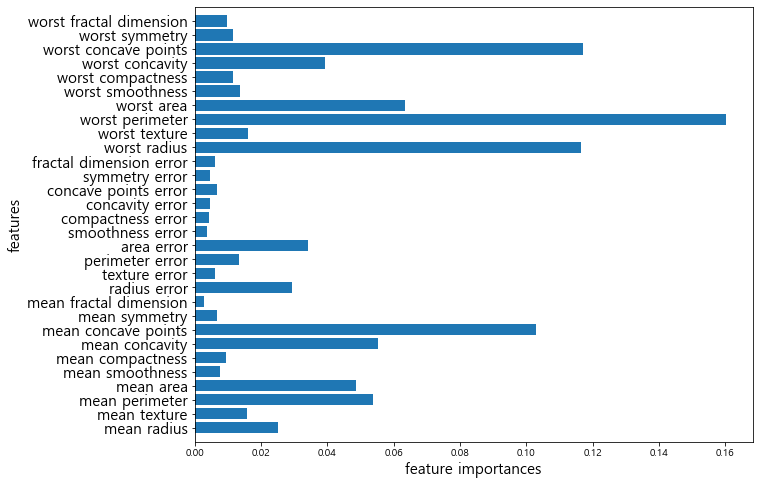

In [143]:
plot_feature_importances_cancer(forest100)

#### Gradient Boosting Regression Tree

In [160]:
from sklearn.ensemble import GradientBoostingClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

print(gbrt)
print(f'train set score : {gbrt.score(X_train, y_train):.3f}')
print(f'test set score : {gbrt.score(X_test, y_test):.3f}')

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
train set score : 1.000
test set score : 0.965


In [157]:
# adjusted max_depth
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

print(f'train set score : {gbrt.score(X_train, y_train):.3f}')
print(f'train set score : {gbrt.score(X_test, y_test):.3f}')

train set score : 0.991
train set score : 0.972


In [158]:
# adjusted learning_rate
gbrt = GradientBoostingClassifier(max_depth=3, n_estimators=100, learning_rate=0.01, random_state=0)
gbrt.fit(X_train, y_train)

print(f'train set score : {gbrt.score(X_train, y_train):.3f}')
print(f'train set score : {gbrt.score(X_test, y_test):.3f}')

train set score : 0.988
train set score : 0.965


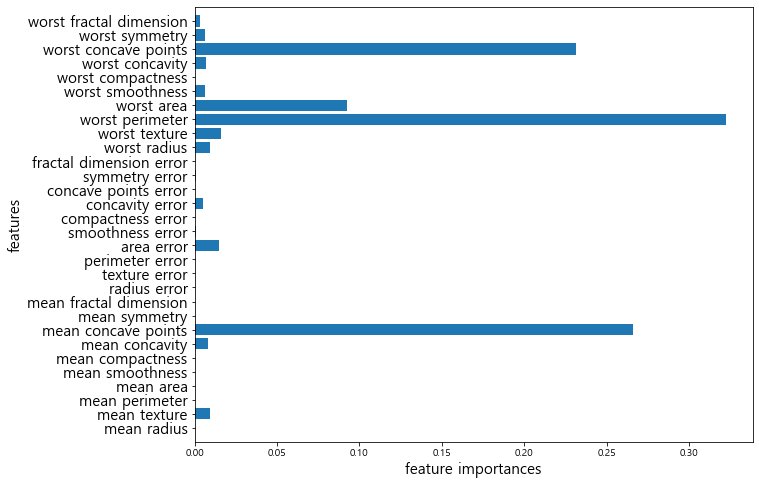

In [159]:
gbrt = GradientBoostingClassifier(max_depth=1, n_estimators=100, learning_rate=0.1, random_state=0)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

#### AdaBoost (Adaptive Boosting)